In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from collections import Counter
import math
import datetime as datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statistics
import glob
import ipyplot
import numpy as np
import matplotlib.pyplot as plt
from pyspedas.mms.mms_orbit_plot import mms_orbit_plot

from functions import data_preprocess_functions
from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

Load IGRF coefficients ...


In [12]:
dir_name = 'idl_plots/output_sc1_sp3_300sec_multi_pa2_en2_subtraction_reduced_removebi_flux0.500.751.00_pap3.02.01.1/'

agg_beam_ext_filename = dir_name + 'idl_aggregated_fulldata_20170101_to_20201231.csv'

agg_df = pd.read_csv(agg_beam_ext_filename)

agg_df['pressure_all'] = agg_df['pressure_h_all'] + agg_df['pressure_o_all']

In [13]:
print(statistics.median(agg_df['swv']))
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Histogram(x=agg_df.loc[:,'swv']) ,row=1, col=1)# 

fig.update_layout(showlegend=False)


372.6560363769531


In [14]:
agg_df.columns

Index(['Unnamed: 0', 'time', 'nbeam', 'energy', 'flag', 'date', 'datetime_str',
       'year', 'xgsm', 'ygsm', 'zgsm', 'ygse', 'zgse', 'mlt', 'l', 'bx',
       'by_gsm', 'bz_gsm', 'b', 'dist', 'beta', 'kp', 'swp', 'swv', 'dst',
       'imfBy', 'imfBz', 'storm_phase', 'compression_mode', 'density_o_all',
       'velocity_o_all', 'pressure_o_all', 'density_h_all', 'velocity_h_all',
       'pressure_h_all', 'v_par_all', 'v_perp_all', 'denergy', 'r', 'region',
       'o_beam_filepath', 'pa', 'pa_range', 'int_flux', 'flux', 'eflux',
       'intergrated_flux', 'density_est', 't', 'n', 'p', 'b_model', 'fllen',
       'pressure_all'],
      dtype='object')

In [18]:
# index = (agg_df['region'] == 'Lobe') & (abs(agg_df['ygsm']) > 10) & (abs(agg_df['ygsm']) < 20)& (agg_df['energy'] > 1000) & (agg_df['energy'] < 3000)

# index = (agg_df['region'] == 'BL') & (abs(agg_df['ygsm']) < 10)& (agg_df['xgsm'] > -10)& (agg_df['energy'] < 100) & (agg_df['xgsm'] < 0)

index = (agg_df['region'] == 'BL') & (agg_df['energy'] > 3000) & (abs(agg_df['ygsm']) < 15)

print(sum(index))
print(statistics.median(agg_df.loc[index,'v_par_all']))
print(statistics.median(agg_df.loc[index,'n']))

fig = px.scatter_3d(agg_df[index], x='xgsm', y='ygsm', z='zgsm', color=np.log10(agg_df.loc[index,'n']),size_max=1, hover_data=['datetime_str', "n", "region","pressure_all"])
fig.update_traces(marker_size = 1)

fig.update_layout(coloraxis_colorbar=dict(
    title="Density (log)",
    thicknessmode="pixels"
))

fig.show()

1041
174.5277815016109
0.0104576778558619


In [6]:
agg_df.loc[index,'datetime_str']
print(agg_df.loc[index,'datetime_str'].to_string())


337      2017-02-09 21:27:30
549      2017-02-28 19:57:30
550      2017-02-28 20:02:30
553      2017-02-28 20:17:30
554      2017-02-28 20:22:30
555      2017-02-28 20:27:30
556      2017-02-28 20:32:30
557      2017-02-28 20:37:30
558      2017-02-28 20:42:30
565      2017-02-28 21:17:30
566      2017-02-28 21:22:30
567      2017-02-28 21:27:30
624      2017-03-03 16:47:30
686      2017-03-05 05:22:30
687      2017-03-05 05:27:30
688      2017-03-05 05:32:30
689      2017-03-05 05:37:30
696      2017-03-06 13:52:30
729      2017-03-08 02:17:30
730      2017-03-08 02:22:30
731      2017-03-08 02:27:30
733      2017-03-08 02:37:30
734      2017-03-08 02:42:30
746      2017-03-08 03:42:30
747      2017-03-08 03:47:30
817      2017-03-12 21:32:30
820      2017-03-12 21:52:30
827      2017-03-12 23:02:30
854      2017-03-20 02:52:30
910      2017-03-22 05:17:30
923      2017-03-23 23:22:30
925      2017-03-23 23:32:30
934      2017-03-24 01:47:30
948      2017-03-24 03:07:30
953      2017-

In [8]:
iplot = 3

to_plot =  np.unique(list(dir_name+(agg_df.loc[index,'o_beam_filepath'])))

print(len(to_plot))

ipyplot.plot_images(to_plot[0+iplot*30:30+iplot*30], img_width=400)

94


In [6]:
index11 = index & (agg_df['region'] == 'Lobe') & (agg_df['energy'] < 100)
index12 = index & (agg_df['region'] == 'Lobe') & (agg_df['energy'] > 100)& (agg_df['energy'] < 1000)
index13 = index & (agg_df['region'] == 'Lobe') & (agg_df['energy'] > 1000)& (agg_df['energy'] < 3000)
index14 = index & (agg_df['region'] == 'Lobe') & (agg_df['energy'] > 3000)

index21 = index & (agg_df['region'] == 'BL') & (agg_df['energy'] < 100)
index22 = index & (agg_df['region'] == 'BL') & (agg_df['energy'] > 100)& (agg_df['energy'] < 1000)
index23 = index & (agg_df['region'] == 'BL') & (agg_df['energy'] > 1000)& (agg_df['energy'] < 3000)
index24 = index & (agg_df['region'] == 'BL') & (agg_df['energy'] > 3000)

index31 = index & (agg_df['region'] == 'PS') & (agg_df['energy'] < 100)
index32 = index & (agg_df['region'] == 'PS') & (agg_df['energy'] > 100)& (agg_df['energy'] < 1000)
index33 = index & (agg_df['region'] == 'PS') & (agg_df['energy'] > 1000)& (agg_df['energy'] < 3000)
index34 = index & (agg_df['region'] == 'PS') & (agg_df['energy'] > 3000)

fig = make_subplots(rows=3, cols=4, subplot_titles=("density: 1-100 eV", "100-1k eV", "1k-3k eV", "3k - 40k eV"))

fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index11,'n'])) ,row=1, col=1)# 


fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index12,'n'])) ,row=1, col=2)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index13,'n'])) ,row=1, col=3)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index14,'n'])) ,row=1, col=4)

fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index21,'n'])) ,row=2, col=1)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index22,'n'])) ,row=2, col=2)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index23,'n'])) ,row=2, col=3)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index24,'n'])) ,row=2, col=4)

fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index31,'n'])) ,row=3, col=1)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index32,'n'])) ,row=3, col=2)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index33,'n'])) ,row=3, col=3)
fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index34,'n'])) ,row=3, col=4)


# #fig.add_trace(go.Histogram(x=agg_df.loc[index12,'v'], xbins=dict(start=0,end=400, size=10)), row=1, col=1)
# fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index1,'n'])) ,row=1, col=2)

# fig.add_trace(go.Histogram(x=agg_df.loc[index2,'v']), row=2, col=1)
# fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index2,'n'])) ,row=2, col=2)

# fig.add_trace(go.Histogram(x=agg_df.loc[index3,'v']), row=3, col=1)
# fig.add_trace(go.Histogram(x= np.log10(agg_df.loc[index3,'n'])) ,row=3, col=2)


fig.update_layout(showlegend=False)


01-Feb-24 17:00:10: Loading pydata/mms1/mec/srvy/l2/epht89q/2019/10/mms1_mec_srvy_l2_epht89q_20191025_v2.2.0.cdf
01-Feb-24 17:00:10: Time clip was applied to: mms1_mec_r_gsm
01-Feb-24 17:00:10: Loaded variables:
01-Feb-24 17:00:10: mms1_mec_r_gsm


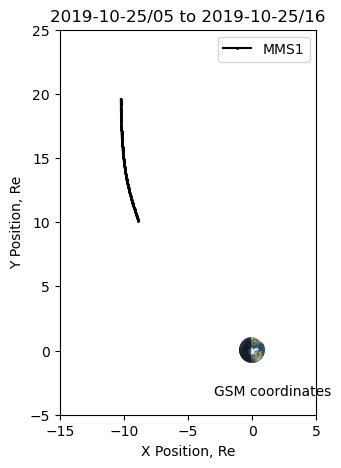

01-Feb-24 17:00:10: Loading pydata/mms1/mec/srvy/l2/epht89q/2019/10/mms1_mec_srvy_l2_epht89q_20191025_v2.2.0.cdf
01-Feb-24 17:00:10: Time clip was applied to: mms1_mec_r_gsm
01-Feb-24 17:00:10: Loaded variables:
01-Feb-24 17:00:10: mms1_mec_r_gsm


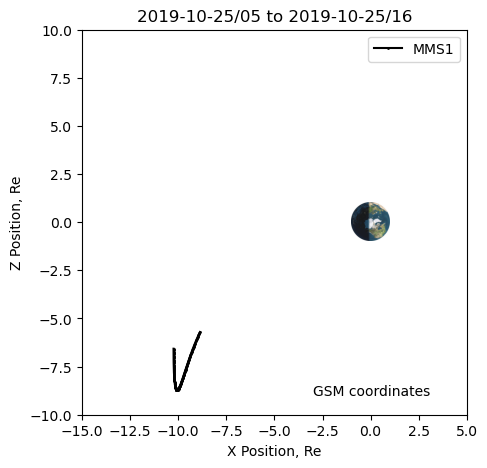

01-Feb-24 17:00:10: Loading pydata/mms1/mec/srvy/l2/epht89q/2019/10/mms1_mec_srvy_l2_epht89q_20191025_v2.2.0.cdf
01-Feb-24 17:00:10: Time clip was applied to: mms1_mec_r_gsm
01-Feb-24 17:00:10: Loaded variables:
01-Feb-24 17:00:10: mms1_mec_r_gsm


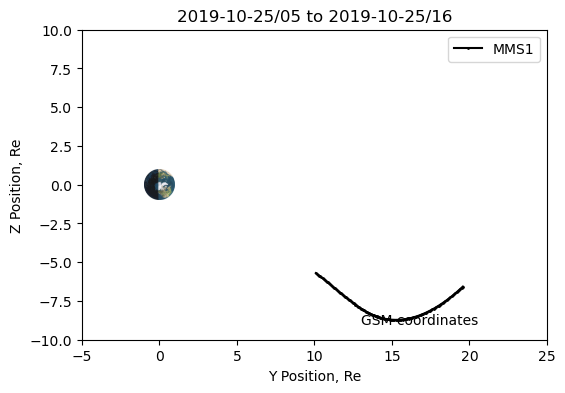

01-Feb-24 17:00:11: Loading pydata/mms1/mec/srvy/l2/epht89q/2017/07/mms1_mec_srvy_l2_epht89q_20170701_v2.0.2.cdf
01-Feb-24 17:00:11: Time clip was applied to: mms1_mec_r_gsm
01-Feb-24 17:00:11: Loaded variables:
01-Feb-24 17:00:11: mms1_mec_r_gsm


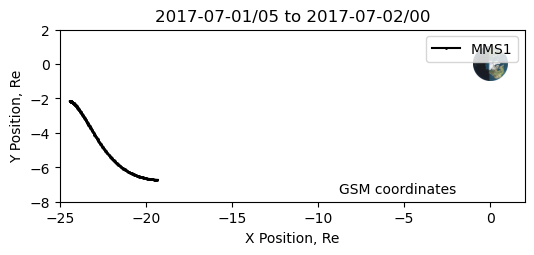

01-Feb-24 17:00:12: Loading pydata/mms1/mec/srvy/l2/epht89q/2017/07/mms1_mec_srvy_l2_epht89q_20170701_v2.0.2.cdf
01-Feb-24 17:00:12: Time clip was applied to: mms1_mec_r_gsm
01-Feb-24 17:00:12: Loaded variables:
01-Feb-24 17:00:12: mms1_mec_r_gsm


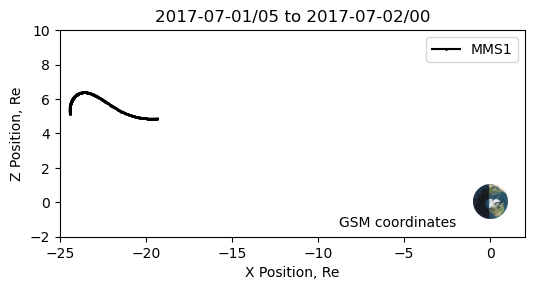

01-Feb-24 17:00:12: Loading pydata/mms1/mec/srvy/l2/epht89q/2017/07/mms1_mec_srvy_l2_epht89q_20170701_v2.0.2.cdf
01-Feb-24 17:00:12: Time clip was applied to: mms1_mec_r_gsm
01-Feb-24 17:00:12: Loaded variables:
01-Feb-24 17:00:12: mms1_mec_r_gsm


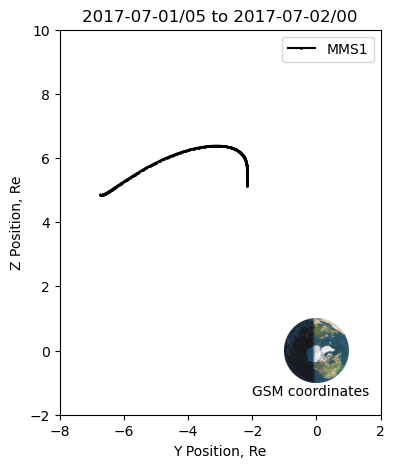

01-Feb-24 17:00:12: Loading pydata/mms1/mec/srvy/l2/epht89q/2020/10/mms1_mec_srvy_l2_epht89q_20201027_v2.2.2.cdf
01-Feb-24 17:00:12: Time clip was applied to: mms1_mec_r_gsm
01-Feb-24 17:00:12: Loaded variables:
01-Feb-24 17:00:12: mms1_mec_r_gsm


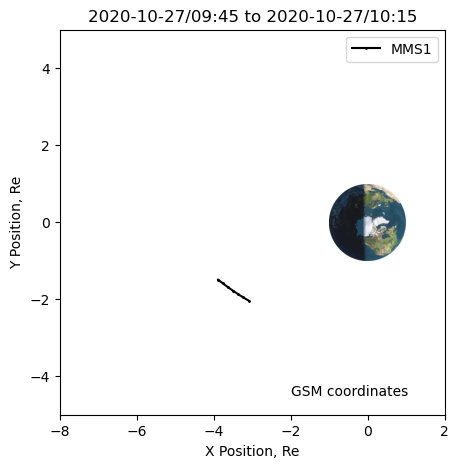

01-Feb-24 17:00:13: Loading pydata/mms1/mec/srvy/l2/epht89q/2020/10/mms1_mec_srvy_l2_epht89q_20201027_v2.2.2.cdf
01-Feb-24 17:00:13: Time clip was applied to: mms1_mec_r_gsm
01-Feb-24 17:00:13: Loaded variables:
01-Feb-24 17:00:13: mms1_mec_r_gsm


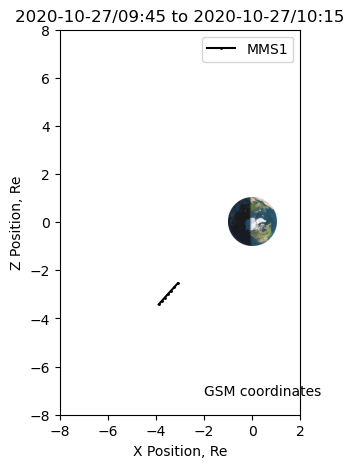

01-Feb-24 17:00:13: Loading pydata/mms1/mec/srvy/l2/epht89q/2020/10/mms1_mec_srvy_l2_epht89q_20201027_v2.2.2.cdf
01-Feb-24 17:00:13: Time clip was applied to: mms1_mec_r_gsm
01-Feb-24 17:00:13: Loaded variables:
01-Feb-24 17:00:13: mms1_mec_r_gsm


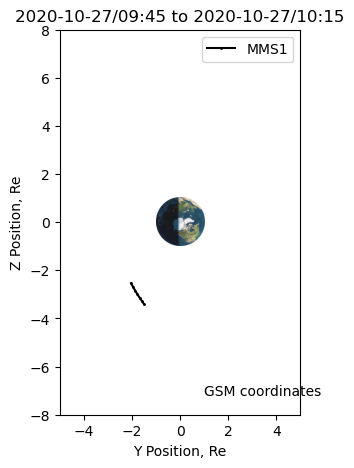

In [7]:
mms_orbit_plot(trange=['2019-10-25/05', '2019-10-25/16'], plane='xy',coord='gsm',xr=[-15,5],yr=[-5,25], marker='.', markersize=2,probes='1',save_svg='orbit_2019_10_25_xy',xsize=6)
mms_orbit_plot(trange=['2019-10-25/05', '2019-10-25/16'], plane='xz',coord='gsm',xr=[-15,5],yr=[-10,10], marker='.', markersize=2,probes='1',save_svg='orbit_2019_10_25_xz',xsize=6)
mms_orbit_plot(trange=['2019-10-25/05', '2019-10-25/16'], plane='yz',coord='gsm',xr=[-5,25],yr=[-10,10], marker='.', markersize=2,probes='1',save_svg='orbit_2019_10_25_yz',xsize=6)

mms_orbit_plot(trange=['2017-07-01/05', '2017-07-02/00'], plane='xy',coord='gsm',xr=[-25,2],yr=[-8,2], marker='.', markersize=2,probes='1',save_svg='orbit_2017_07_01_xy',xsize=6)
mms_orbit_plot(trange=['2017-07-01/05', '2017-07-02/00'], plane='xz',coord='gsm',xr=[-25,2],yr=[-2,10], marker='.', markersize=2,probes='1',save_svg='orbit_2017_07_01_xz',xsize=6)
mms_orbit_plot(trange=['2017-07-01/05', '2017-07-02/00'], plane='yz',coord='gsm',xr=[-8,2],yr=[-2,10], marker='.', markersize=2,probes='1',save_svg='orbit_2017_07_01_yz',xsize=6)

mms_orbit_plot(trange=['2020-10-27/09:45', '2020-10-27/10:15'], plane='xy',coord='gsm',xr=[-8,2],yr=[-5,5], marker='.', markersize=2,probes='1',save_svg='orbit_2020_10_27_xy',xsize=6)
mms_orbit_plot(trange=['2020-10-27/09:45', '2020-10-27/10:15'], plane='xz',coord='gsm',xr=[-8,2],yr=[-8,8], marker='.', markersize=2,probes='1',save_svg='orbit_2020_10_27_xz',xsize=6)
mms_orbit_plot(trange=['2020-10-27/09:45', '2020-10-27/10:15'], plane='yz',coord='gsm',xr=[-5,5],yr=[-8,8], marker='.', markersize=2,probes='1',save_svg='orbit_2020_10_27_yz',xsize=6)